### 1. 목표
- iris(붓꽃)의 꽃잎 길이, 꽃잎 너비, 꽃받침 길이, 꽃받침 너비 특성들을 활용하여 3가지 품종으로 분류
- KNN 모델의 이웃(k) 숫자를 조절(하이퍼파라미터 튜닝)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris # iris 데이터셋 로드
from sklearn.model_selection import train_test_split # train, test 데이터 자동 분류
from sklearn.neighbors import KNeighborsClassifier # KNN 모델 로드
from sklearn import metrics # 모델 평가 지표 

### 2. 데이터 수집
- 학습용으로 제작된 iris 데이터를 로드

In [2]:
iris_data = load_iris()
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

### 3. 데이터 전처리
- 학습용으로 만들어진 데이터이기 때문에 전처리는 필요하지 않음

### 4. 탐색적 데이터 분석
- 데이터의 구조를 확인

- data : 문제 데이터
- target : 정답 데이터
- target_names : 정답 데이터 명
- feature_names : 컬럼명
- DESCR : 데이터셋에 대한 설명
- filename : 파일 경로 및 이름

In [3]:
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

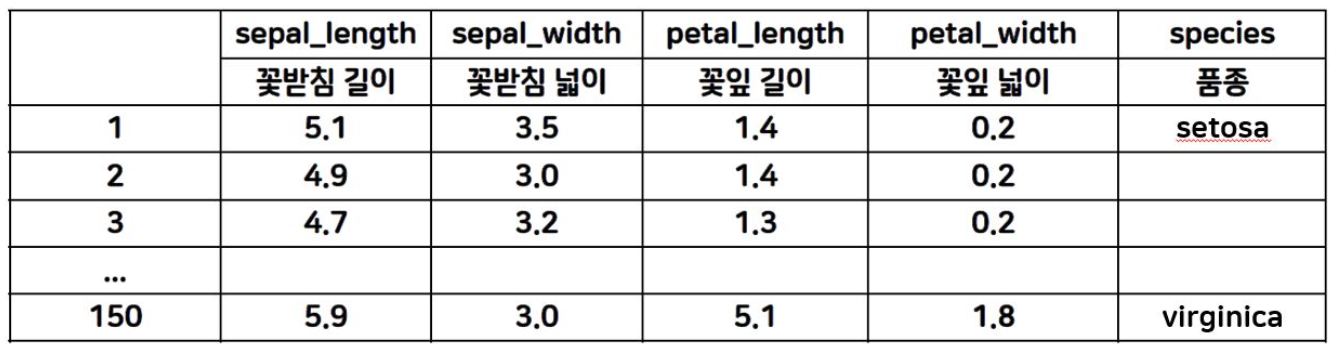

In [19]:
iris_data.values()

dict_values([array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
 

In [25]:
iris_data["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [18]:
iris_data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [20]:
iris_data["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [21]:
# 0, 1, 2는 차례대로 target_names
iris_data["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
iris_data["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [24]:
print(iris_data["data"].shape)
print(iris_data["target"].shape)

(150, 4)
(150,)


In [26]:
iris_data["DESCR"]

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

- 데이터 프레임 형식으로 문제 데이터를 변환 (컬럼명을 feature_names로 삽입)

In [37]:
# pd.DataFrame(데이터, columns = "컬럼명 리스트", index = "인덱스명 리스트")
# 데이터의 행 갯수는 index와 같아야하며, 열 갯수는 columns와 같아야 함
iris_df = pd.DataFrame(iris_data["data"], columns = iris_data["feature_names"])
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- 문제(X)와 정답(y)으로 분리

In [49]:
# 문제를 학습시키기 위해서는 데이터 프레임 형식으로 변환하여야 함
X = iris_df
y = iris_data["target"]

- 학습 데이터와 평가 데이터로 분리 (7 : 3)

In [162]:
# 학습 데이터와 평가 데이터로 분리해주는 함수
# train_test_split(문제, 정답, test_size=나눌 비율, random_state=랜덤 시드값)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 5)
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
126,6.2,2.8,4.8,1.8
61,5.9,3.0,4.2,1.5
124,6.7,3.3,5.7,2.1
117,7.7,3.8,6.7,2.2
20,5.4,3.4,1.7,0.2
...,...,...,...,...
8,4.4,2.9,1.4,0.2
73,6.1,2.8,4.7,1.2
144,6.7,3.3,5.7,2.5
118,7.7,2.6,6.9,2.3


- 시각화
- 한번에 여러 특성들을 비교할 수 있는 산점도 매트릭스 활용

array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

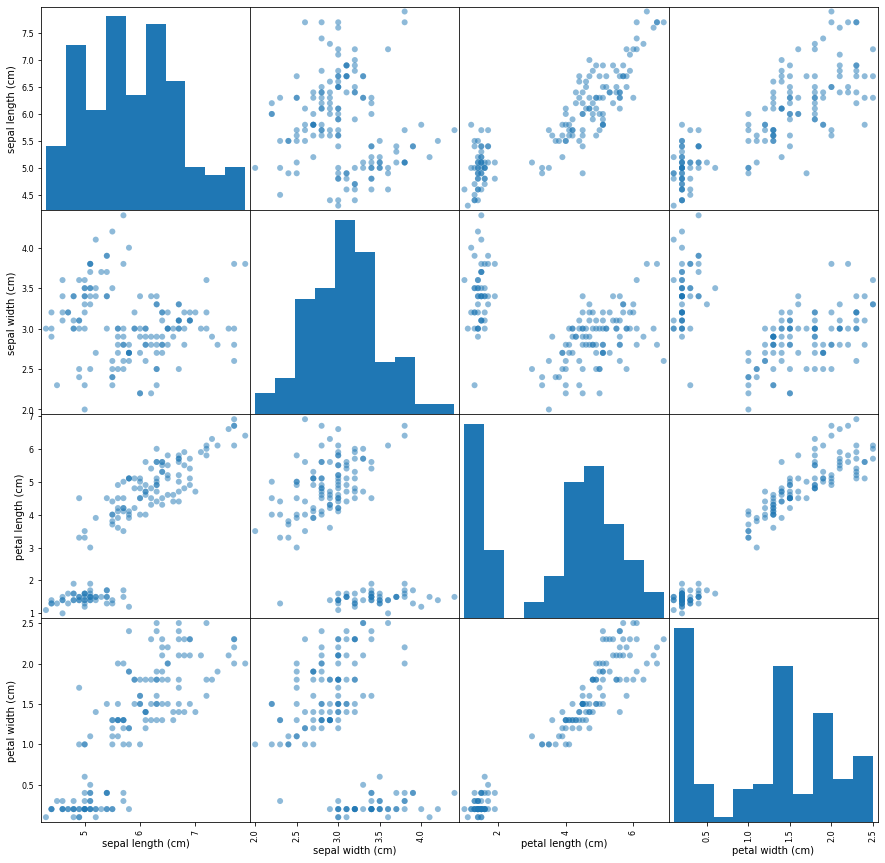

In [54]:
# 판다스에서 제공하는 산점도 매트릭스 생성
pd.plotting.scatter_matrix(iris_df, 
                           figsize=(15, 15), # 매트릭스의 사이즈
                           marker = 'o', # 데이터의 형태('o' : 동그라미, 's' : 네모, '^' : 세모)
                           alpha = 0.5) # 매트릭스의 투명도(0 : 완전 투명, 1 : 완전 불투명)

### 5. 모델링(모델 선택, 학습, 평가)

In [132]:
# KNN 모델 로드
model = KNeighborsClassifier(n_neighbors=3)

In [133]:
# 모델 학습
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [134]:
# 평가용 문제 데이터를 넣어서 정답 예측
pre = model.predict(X_test)

In [135]:
# 정확도를 확인
metrics.accuracy_score(pre, y_test)

0.9555555555555556

### 하이퍼 파라미터 튜닝

In [163]:
train_list = []
test_list = []

for k in range(1, 100, 2):
    # 모델 생성
    model = KNeighborsClassifier(n_neighbors= k)
    # 모델 학습
    model.fit(X_train, y_train)
    
    # 학습한 모델로 예측 & 정확도 확인
    # 학습 데이터
    train_pre = model.predict(X_train)
    train_score = metrics.accuracy_score(train_pre, y_train)
    train_list.append(train_score)
    
    # 평가 데이터
    test_pre = model.predict(X_test)
    test_score = metrics.accuracy_score(test_pre, y_test)
    test_list.append(test_score)

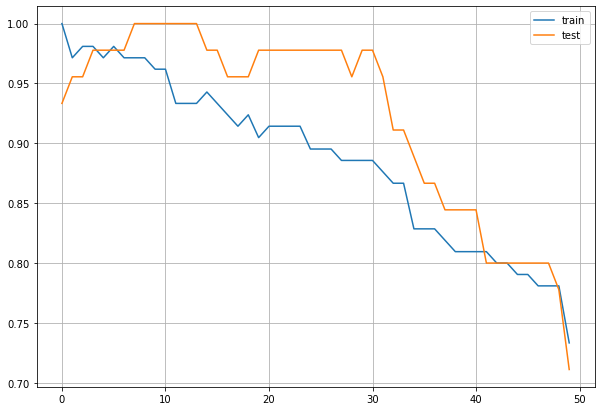

In [166]:
plt.figure(figsize = (10, 7))
plt.plot(train_list, label = "train")
plt.plot(test_list, label = "test")
plt.legend()
plt.grid()
plt.show()

train 데이터가 test 데이터보다 훨씬 정확도가 높은 경우 : 과대적합 <br>
k값이 너무 커서 학습이 되지 않아 train, test 데이터의 정확도가 둘 다 떨어지는 경우 : 과소적합